In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wr
wr.filterwarnings('ignore')

In [6]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df = df.drop(['CustomerID','Gender'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df = df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'})
df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### ***Visualization***

<Figure size 600x600 with 0 Axes>

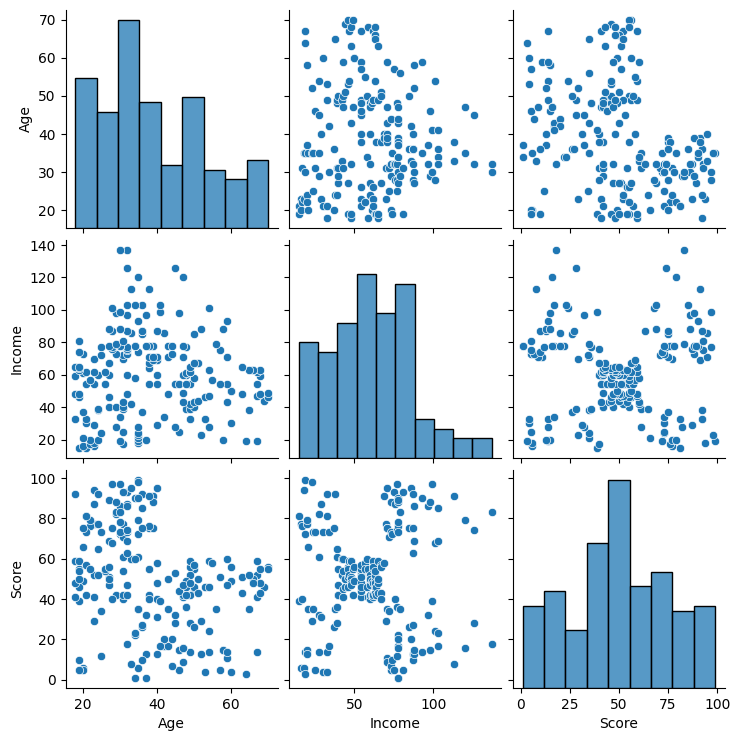

<Figure size 600x600 with 0 Axes>

In [17]:
sns.pairplot(df)
plt.figure(figsize=(6,6))

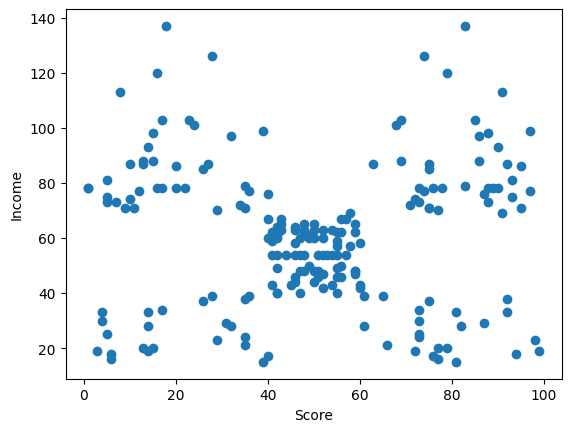

In [20]:
plt.scatter(df.Score, df.Income) 
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

# ***K-Means***

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8)          #default
km.fit(df[['Score', 'Income']])

KMeans()

In [47]:
km.predict(df[['Score', 'Income']])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 2, 1, 2, 1, 2,
       6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 5, 1, 5, 7, 5, 7, 5, 7, 5,
       7, 5])

In [48]:
df['km_cluster'] = km.predict(df[['Score', 'Income']])
df.head()

,Age,Income,Score,km_cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [49]:
km.predict([[37, 20]])

array([4])

In [55]:
centroid = km.cluster_centers_
centroid

array([[ 51.61363636,  47.65909091],
       [ 15.32142857,  84.46428571],
       [ 82.9375    ,  80.375     ],
       [ 80.04761905,  25.0952381 ],
       [ 20.22727273,  25.72727273],
       [ 78.42857143, 114.71428571],
       [ 46.21428571,  63.95238095],
       [ 17.5       , 124.        ]])

In [51]:
df1 = df[df.km_cluster==0]
df2 = df[df.km_cluster==1]
df3 = df[df.km_cluster==2]
df4 = df[df.km_cluster==3]
df5 = df[df.km_cluster==4]
df6 = df[df.km_cluster==5]
df7 = df[df.km_cluster==6]
df8 = df[df.km_cluster==7]

In [52]:
df1.head()

,Age,Income,Score,km_cluster
42,48,39,36,0
43,31,39,61,0
45,24,39,65,0
46,50,40,55,0
47,27,40,47,0


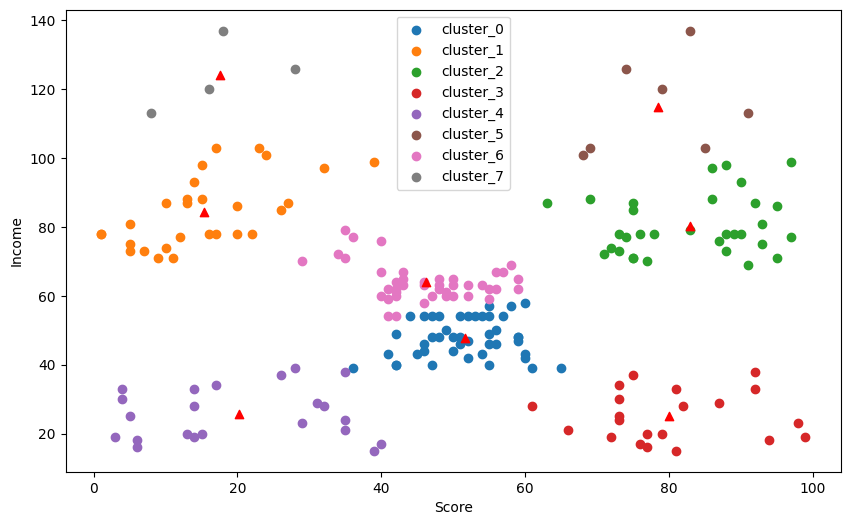

In [60]:
plt.figure(figsize=(10,6))

plt.scatter(df1.Score, df1.Income, label='cluster_0') 
plt.scatter(df2.Score, df2.Income, label='cluster_1') 
plt.scatter(df3.Score, df3.Income, label='cluster_2')
plt.scatter(df4.Score, df4.Income, label='cluster_3') 
plt.scatter(df5.Score, df5.Income, label='cluster_4') 
plt.scatter(df6.Score, df6.Income, label='cluster_5') 
plt.scatter(df7.Score, df7.Income, label='cluster_6') 
plt.scatter(df8.Score, df8.Income, label='cluster_7')

plt.scatter(centroid[:,0], centroid[:,1], marker='^', color='red')

plt.legend()
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

<Axes: xlabel='Score', ylabel='Income'>

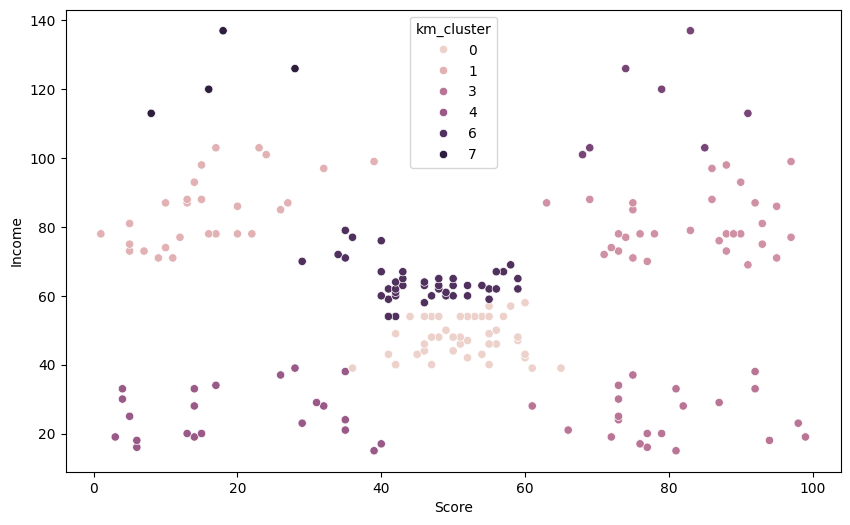

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Score', y='Income', hue='km_cluster')

### ***Elbow Method (Choose the optimal number of clusters (K))***   
***It is based on `inertia` (`WCSS` – Within-Cluster Sum of Squares).***

In [63]:
wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(df[['Score', 'Income']])
    wcss.append(km.inertia_)

wcss

[269981.28,
 183714.0808217326,
 106348.37306211119,
 82472.19413919415,
 44454.47647967974,
 38797.9027638142,
 33642.57922077922,
 30432.05498628139,
 24484.399095719098,
 21664.73260575209,
 18040.68747364966,
 16820.292849339152,
 14624.067032967034,
 13879.235764235766]

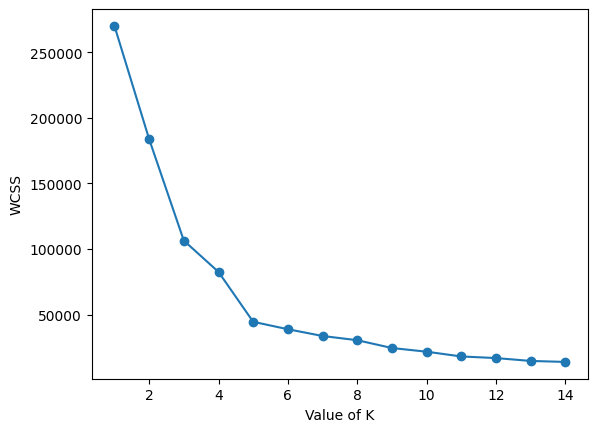

In [64]:
plt.plot(range(1,15), wcss, marker='o')

plt.xlabel('Value of K')
plt.ylabel('WCSS')
plt.show()

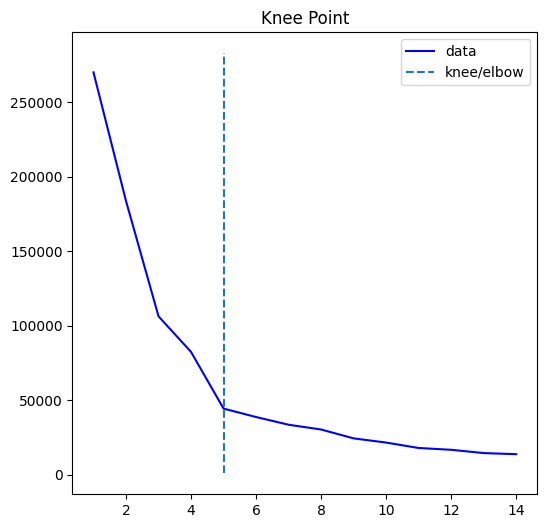

<Figure size 600x600 with 0 Axes>

In [71]:
from kneed import KneeLocator
kne = KneeLocator(range(1,15), wcss, curve='convex', direction='decreasing')
kne.plot_knee()

plt.figure(figsize=(6,6))
plt.show()

In [72]:
kne.knee

5

### ***Optimized Cluster (K=5)***

In [73]:
km = KMeans(n_clusters=5)      
km.fit(df[['Score', 'Income']])

KMeans(n_clusters=5)

In [80]:
df['km_cluster'] = km.predict(df[['Score', 'Income']])
df.head()

,Age,Income,Score,km_cluster
0,19,15,39,2
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,2


In [75]:
centroid = km.cluster_centers_
centroid

array([[79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.58333333, 87.75      ],
       [49.7125    , 55.0875    ]])

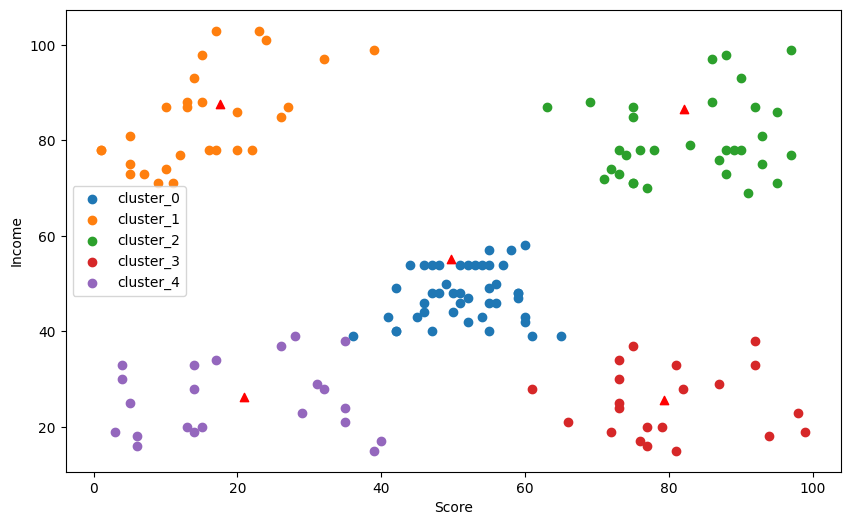

In [76]:
plt.figure(figsize=(10,6))

plt.scatter(df1.Score, df1.Income, label='cluster_0') 
plt.scatter(df2.Score, df2.Income, label='cluster_1') 
plt.scatter(df3.Score, df3.Income, label='cluster_2')
plt.scatter(df4.Score, df4.Income, label='cluster_3') 
plt.scatter(df5.Score, df5.Income, label='cluster_4') 

plt.scatter(centroid[:,0], centroid[:,1], marker='^', color='red')

plt.legend()
plt.xlabel('Score')
plt.ylabel('Income')
plt.show()

In [81]:
km.predict([[20,80]])

array([3])